<a href="https://colab.research.google.com/github/stephenfrein/tree_models/blob/master/Gini_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.tree.export module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)


|--- Shape_Square <= 0.50
|   |--- Color_Blue <= 0.50
|   |   |--- class: True
|   |--- Color_Blue >  0.50
|   |   |--- class: False
|--- Shape_Square >  0.50
|   |--- Color_Green <= 0.50
|   |   |--- class: False
|   |--- Color_Green >  0.50
|   |   |--- class: False



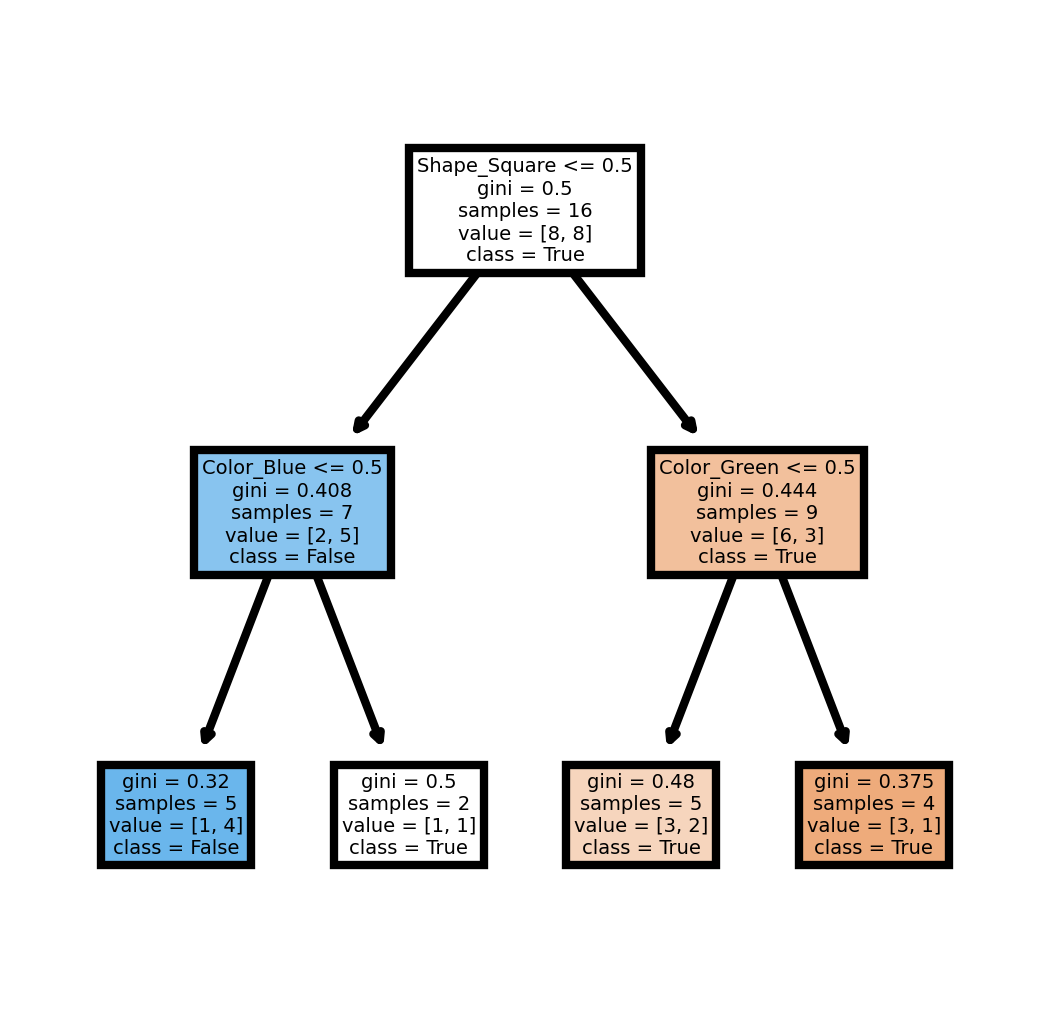

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu Jul 30 10:12:23 2020

@author: sfrein200
"""

import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree.export import export_text

# get raw data and put in data frame
url = "https://raw.githubusercontent.com/stephenfrein/tree_models/master/demo_gini.csv"
gini_data = pd.read_csv(url)
gini_data.head(n=16)


# one-hot encode character variables
gini_data = pd.get_dummies(gini_data, columns=["Shape","Color"])

# predictor variables - all but column called acceptability
X = gini_data.drop("Outcome",1)
# target variable
y = gini_data["Outcome"]


# decision tree classifier with max depth to avoid overfitting
simple_tree = DecisionTreeClassifier(criterion='gini')
# train decision tree classifer
simple_tree = simple_tree.fit(X,y)

plt.figure(figsize=(2,2), dpi=600)
tree.plot_tree(simple_tree.fit(X,y), feature_names = list(X.columns), 
               class_names=['True','False'], filled=True)
print(export_text(simple_tree, feature_names = list(X.columns)))
